Reading the CSV File

In [26]:
import pandas as pd
df=pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


rank correlation : common words

Getting familiar with the dataset

In [3]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Checking the datatypes of columns

mention percentages for the industries which are fake

In [4]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

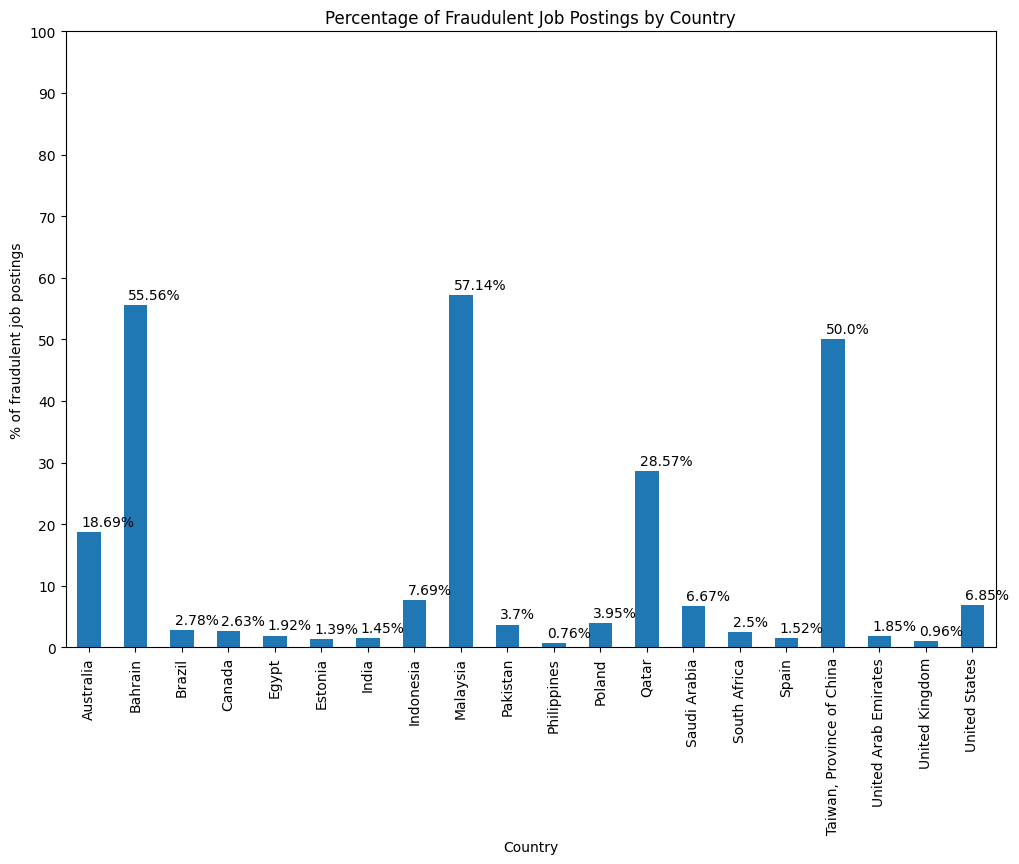

In [5]:

import pycountry
import numpy as np
import matplotlib.pyplot as plt
def get_country_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return code


df = df.dropna(subset=['location'])


df['country_code'] = df['location'].apply(lambda x: x.split(',')[0].strip())


df['country'] = df['country_code'].apply(get_country_name)


country_counts = df.groupby('country')['fraudulent'].value_counts(normalize=True).loc[:, 1] * 100

plt.figure(figsize=(12,8))
ax = country_counts.plot(kind='bar')
ax.set_xlabel('Country')
ax.set_ylabel('% of fraudulent job postings')
ax.set_title('Percentage of Fraudulent Job Postings by Country')
ax.set_yticks(range(0, 101, 10))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', (p.get_x() + 0.1, p.get_height() + 1))
    

labels = [get_country_name(code.get_text()) for code in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.show()



Performing tokenization of words in job description and benefits using Natural Language Toolkit Library (Didn't produce useful results)

Dropping rows that has invalid values in the salary_range. 

In [6]:
import pandas as pd
import pandas as pd
df1 = df.dropna(subset=['salary_range'])
df1

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_code,country
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,DE,Germany
10,11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",NaN,100000-120000,NaN,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - FullBonus Eligible - YesInterview T...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,US,United States
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,SG,Singapore
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,US,United States
31,32,Software Applications Specialist,"US, KS,",NaN,50000-65000,NaN,"Day to Day-Install, upgrade and configure web-...",Must Have's3+ years of experience with web-bas...,"Medical, Dental, Vision, Life, Disability, Pre...",0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0,US,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17844,17845,Sr. Scm Web Development Technical Lead,"US, CA, los Angeles",NaN,0-0,NaN,Title: Sr. SCM Web Development Technical LeadL...,Related experience Undertake project specific ...,NaN,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,US,United States
17849,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,US,United States
17865,17866,Portfolio Development Associate - Paris & rest...,"GB, LND, London",Sales,18000-20000,We're hiring!AvenueStory is a concept driven b...,"AvenueStory is looking for a curious, ambitiou...","Comfortable on the phone, fluent in French and...","Working within a small, young dynamic team in ...",0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0,GB,United Kingdom
17867,17868,Admin Assistant,"GB, WSX, Chichester",Sales,18000-19000,NaN,We are seeking an administrator to work in a b...,Proficient experience in Microsoft Word and Ex...,"Salary £18,000Commission available after quali...",0,1,0,Full-time,Entry level,Unspecified,Human Resources,Sales,0,GB,United Kingdom


Creating the correlation matrix between all the numerical columns

In [7]:
import seaborn as sns
import pandas as pd
cols = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
corr = df[cols].corr()
corr

,telecommuting,has_company_logo,has_questions,fraudulent
telecommuting,1.000000,-0.019313,0.020492,0.035535
has_company_logo,-0.019313,1.000000,0.233241,-0.259224
has_questions,0.020492,0.233241,1.000000,-0.089066
fraudulent,0.035535,-0.259224,-0.089066,1.000000


label encoding for countries

Creating a heatmap

<Axes: >

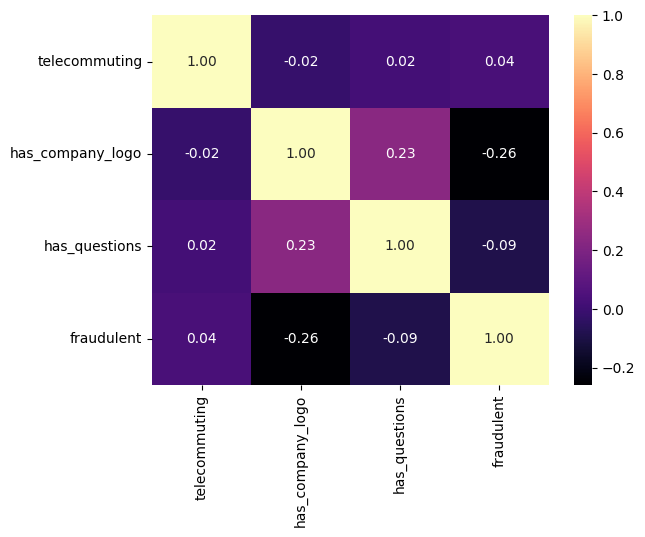

In [8]:
sns.heatmap(corr, cmap='magma', annot=True, fmt='.2f')

In [9]:
from scipy.stats import ttest_ind


for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        real_jobs = df.loc[df['fraudulent'] == 0, col]
        fake_jobs = df.loc[df['fraudulent'] == 1, col]
        t_stat, p_value = ttest_ind(real_jobs, fake_jobs, equal_var=False)
        print(f"Column {col}: t-statistic={t_stat:.2f}, p-value={p_value:.2f}")
    else:
        print(f"Column {col}: Data type is {df[col].dtype}")



Column job_id: t-statistic=-8.98, p-value=0.00
Column title: Data type is object
Column location: Data type is object
Column department: Data type is object
Column salary_range: Data type is object
Column company_profile: Data type is object
Column description: Data type is object
Column requirements: Data type is object
Column benefits: Data type is object
Column telecommuting: t-statistic=-3.66, p-value=0.00
Column has_company_logo: t-statistic=29.73, p-value=0.00
Column has_questions: t-statistic=12.87, p-value=0.00
Column employment_type: Data type is object
Column required_experience: Data type is object
Column required_education: Data type is object
Column industry: Data type is object
Column function: Data type is object
Column fraudulent: t-statistic=-inf, p-value=0.00
Column country_code: Data type is object
Column country: Data type is object


C:\Users\12294\AppData\Local\Temp\ipykernel_10792\3752710623.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(real_jobs, fake_jobs, equal_var=False)


Top 10 industries by job postings

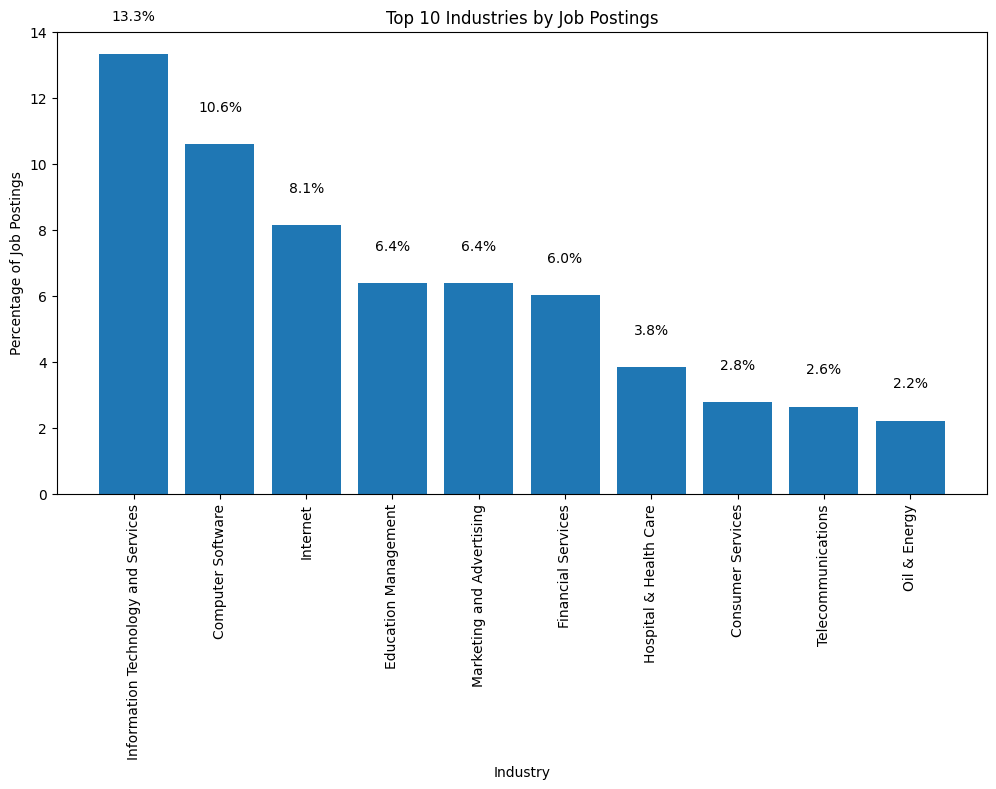

In [10]:
import matplotlib.pyplot as plt
top_industries = df['industry'].value_counts(normalize=True).nlargest(10) * 100
plt.figure(figsize=(12,6))
plt.bar(top_industries.index, top_industries.values)
plt.title('Top 10 Industries by Job Postings')
plt.xlabel('Industry')
plt.ylabel('Percentage of Job Postings')
plt.xticks(rotation=90)
for i, v in enumerate(top_industries):
    plt.text(i, v+1, f"{v:.1f}%", ha='center')
plt.show()

Top 10 industries with Fake job postings

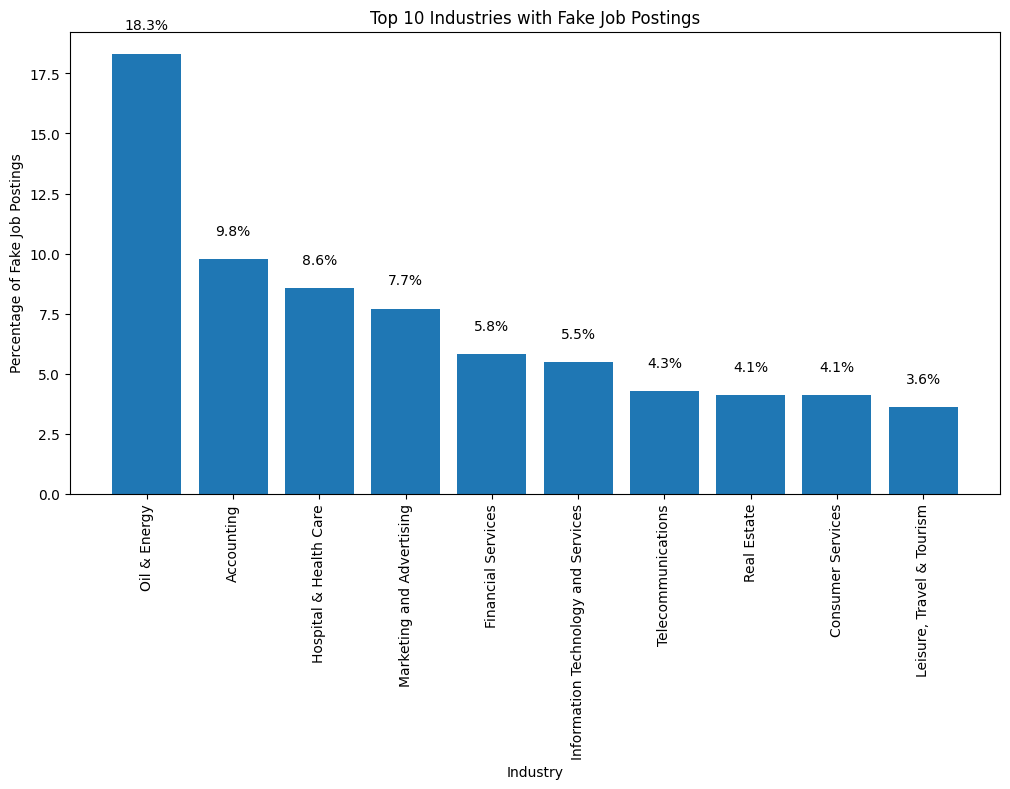

In [11]:
fraudulent_df = df[df['fraudulent'] == 1]
top_fraudulent_industries = fraudulent_df['industry'].value_counts(normalize=True).nlargest(10) * 100
plt.figure(figsize=(12,6))
plt.bar(top_fraudulent_industries.index, top_fraudulent_industries.values)
plt.title('Top 10 Industries with Fake Job Postings')
plt.xlabel('Industry')
plt.ylabel('Percentage of Fake Job Postings')
plt.xticks(rotation=90)
for i, v in enumerate(top_fraudulent_industries):
    plt.text(i, v+1, f"{v:.1f}%", ha='center')
plt.show()


Employment Type by Fradulent vs Non-Fradulent Job Postings

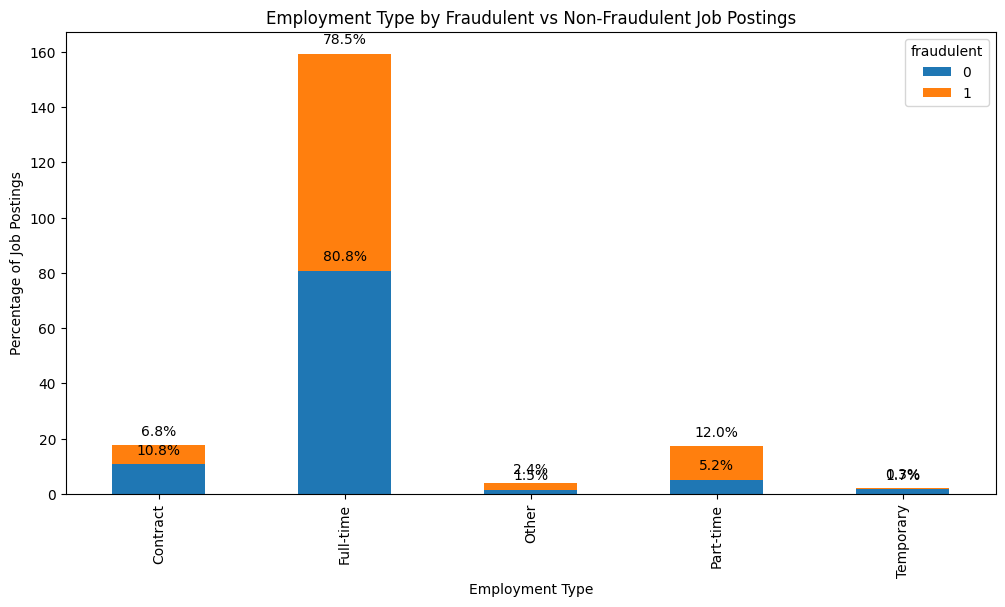

In [12]:
emp_type_counts = df.groupby(['employment_type', 'fraudulent']).size().unstack(fill_value=0)
emp_type_percents = emp_type_counts.apply(lambda x: 100 * x / x.sum(), axis=0)
ax = emp_type_percents.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title('Employment Type by Fraudulent vs Non-Fraudulent Job Postings')
ax.set_xlabel('Employment Type')
ax.set_ylabel('Percentage of Job Postings')
for container in ax.containers:
 ax.bar_label(container, label_type='edge', labels=[f"{val:.1f}%" if val != 0 else "" for val in container.datavalues], padding=5)
plt.show()

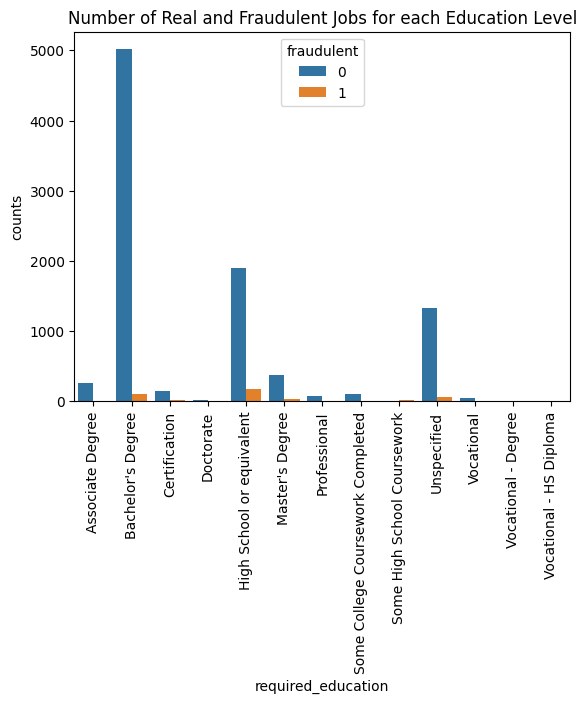

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

edu_counts = df.groupby(['required_education', 'fraudulent'])['fraudulent'].count().reset_index(name='counts')
sns.barplot(x='required_education', y='counts', hue='fraudulent', data=edu_counts)
plt.xticks(rotation=90)
plt.title('Number of Real and Fraudulent Jobs for each Education Level')
plt.show()


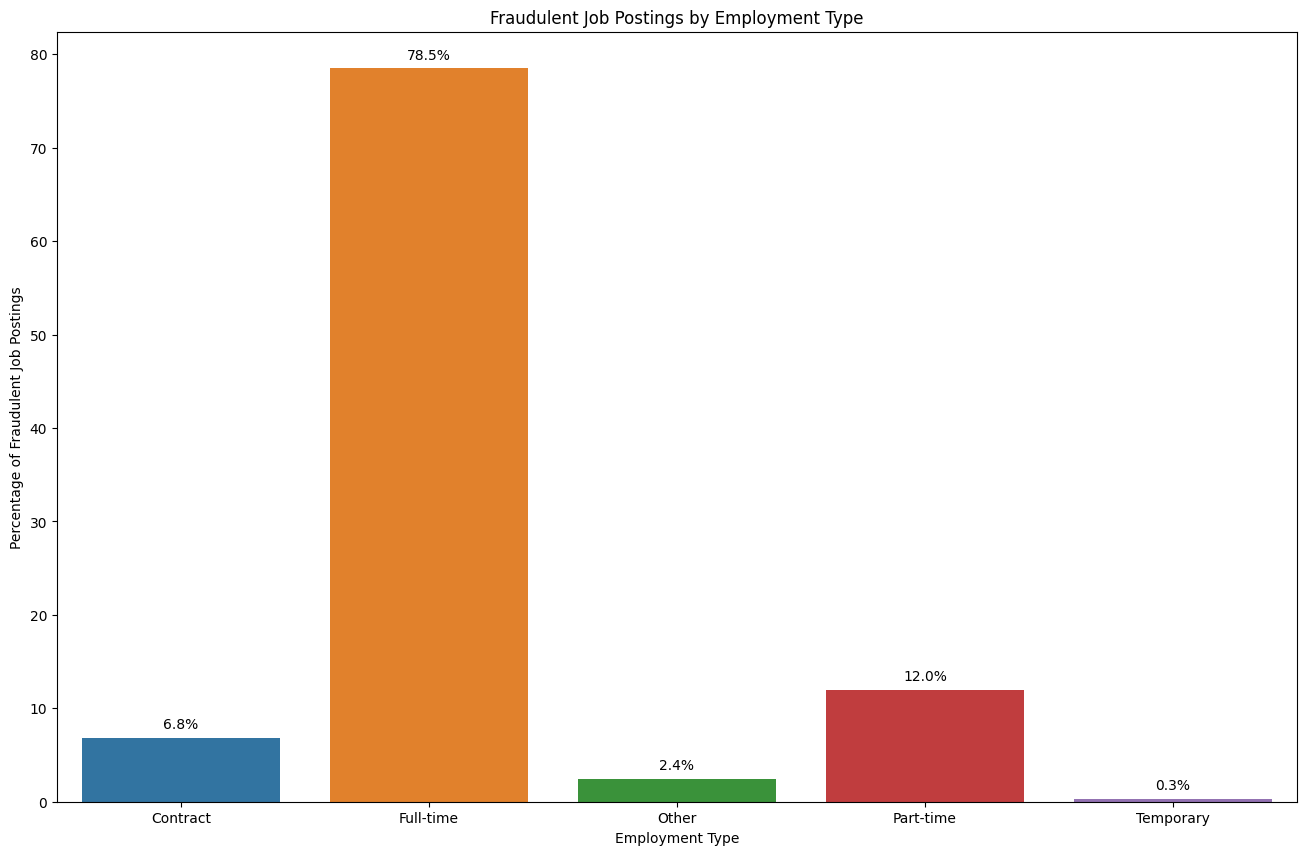

In [14]:
plt.figure(figsize=(16, 10))
df_fraud = df[df['fraudulent'] == 1]

df_fraud_by_emp_type = df_fraud.groupby('employment_type').size().reset_index(name='count')
df_fraud_by_emp_type['percentage'] = df_fraud_by_emp_type['count'] / df_fraud_by_emp_type['count'].sum() * 100
sns.barplot(x='employment_type', y='percentage', data=df_fraud_by_emp_type)
plt.title('Fraudulent Job Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Fraudulent Job Postings')
for index, row in df_fraud_by_emp_type.iterrows():
 plt.text(row.name, row.percentage + 1, f"{row.percentage:.1f}%", ha='center')
plt.show()

Creating new columns Minimum Salary, Maximum Salary and Average Salary for further analysis

In [15]:
df['salary_min'] = df['salary_range'].apply(lambda x: int(x.split('-')[0].replace('$','').replace(',','')) if isinstance(x, str) and '-' in x and x.split('-')[0].replace('$','').replace(',','').isdigit() else None)
df['salary_max'] = df['salary_range'].apply(lambda x: int(x.split('-')[1].replace('$','').replace(',','')) if isinstance(x, str) and '-' in x and x.split('-')[1].replace('$','').replace(',','').isdigit() else None)
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2
df['job_type'] = df['employment_type'] + ' (' + df['required_experience'] + ')'
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country_code', 'country', 'salary_min', 'salary_max',
       'salary_avg', 'job_type'],
      dtype='object')

In [16]:

median_salary = df.groupby('fraudulent')[['salary_min', 'salary_max']].median()
median_salary


,salary_min,salary_max
fraudulent,,
0,36000.0,50000.0
1,30000.0,45000.0


In [17]:

salary_means = df.groupby('fraudulent')['salary_min', 'salary_max'].mean()
salary_means

C:\Users\12294\AppData\Local\Temp\ipykernel_10792\788251895.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_means = df.groupby('fraudulent')['salary_min', 'salary_max'].mean()


,salary_min,salary_max
fraudulent,,
0,552972.566959,872528.500384
1,66333.031818,159935.624434


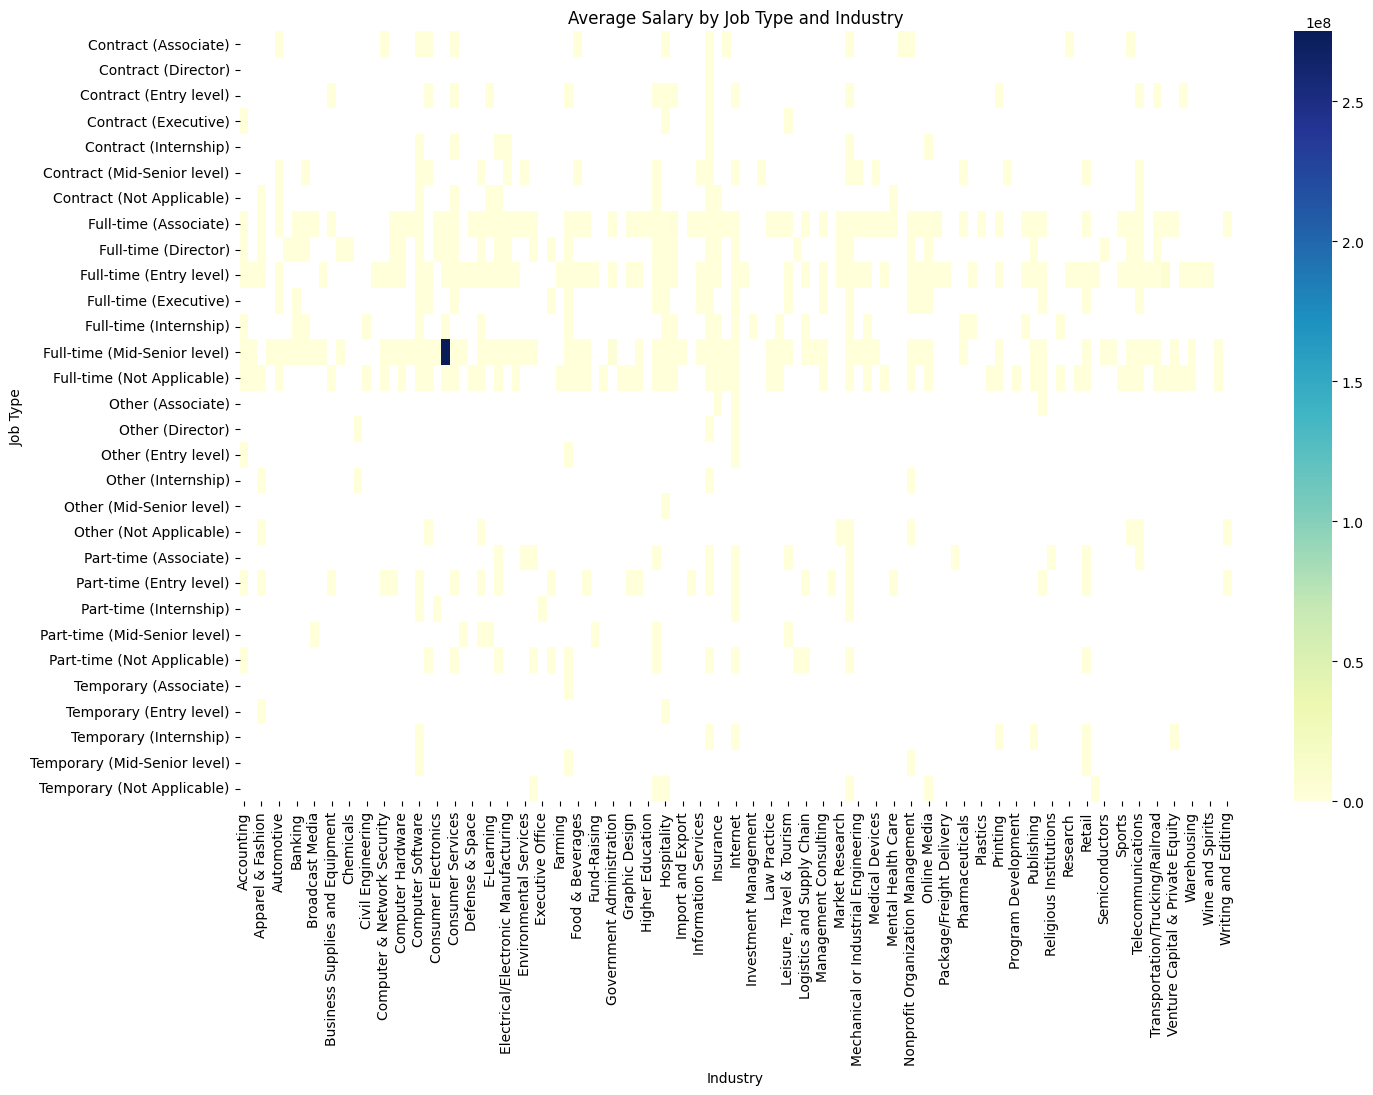

In [18]:
plt.figure(figsize=(16, 10))
pivot = pd.pivot_table(df, values='salary_avg', index='job_type', columns='industry', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Average Salary by Job Type and Industry')
plt.xlabel('Industry')
plt.ylabel('Job Type')
plt.show()

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


df = df[['salary_min', 'salary_max', 'country', 'description', 'department', 'required_education', 'requirements', 'fraudulent']]

df.dropna(inplace=True)

text = df['description'] + ' ' + df['department'].fillna('') + ' ' + df['required_education'].fillna('') + ' ' + df['requirements'].fillna('')

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train
y_pred = rf.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       292
           1       1.00      0.39      0.57        33

    accuracy                           0.94       325
   macro avg       0.97      0.70      0.77       325
weighted avg       0.94      0.94      0.93       325



In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = df[['salary_min', 'salary_max', 'country', 'description', 'department', 'required_education', 'requirements', 'fraudulent']]

df.dropna(inplace=True)

text = df['description'] + ' ' + df['department'].fillna('') + ' ' + df['required_education'].fillna('') + ' ' + df['requirements'].fillna('')

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)
y = df['fraudulent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred))

svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("SVM:")
print(classification_report(y_test, y_pred))


Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       292
           1       1.00      0.45      0.62        33

    accuracy                           0.94       325
   macro avg       0.97      0.73      0.80       325
weighted avg       0.95      0.94      0.94       325

SVM:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       292
           1       1.00      0.42      0.60        33

    accuracy                           0.94       325
   macro avg       0.97      0.71      0.78       325
weighted avg       0.95      0.94      0.93       325



In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = df[['salary_min', 'salary_max', 'country', 'description', 'department', 'required_education', 'requirements', 'fraudulent']]

df.dropna(inplace=True)

text = df['description'] + ' ' + df['department'].fillna('') + ' ' + df['required_education'].fillna('') + ' ' + df['requirements'].fillna('')

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       292
           1       1.00      0.45      0.62        33

    accuracy                           0.94       325
   macro avg       0.97      0.73      0.80       325
weighted avg       0.95      0.94      0.94       325



In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



df = df[['salary_min', 'salary_max', 'country', 'description', 'department', 'required_education', 'requirements', 'fraudulent']]


df.dropna(inplace=True)


text = df['description'] + ' ' + df['department'].fillna('') + ' ' + df['required_education'].fillna('') + ' ' + df['requirements'].fillna('')

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

y = df['fraudulent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       292
           1       1.00      0.12      0.22        33

    accuracy                           0.91       325
   macro avg       0.95      0.56      0.58       325
weighted avg       0.92      0.91      0.88       325



In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


df = df[['salary_min', 'salary_max', 'country', 'description', 'department', 'required_education', 'requirements', 'fraudulent']]


df.dropna(inplace=True)

text = df['description'] + ' ' + df['department'].fillna('') + ' ' + df['required_education'].fillna('') + ' ' + df['requirements'].fillna('')


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text)

y = df['fraudulent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       292
           1       1.00      0.45      0.62        33

    accuracy                           0.94       325
   macro avg       0.97      0.73      0.80       325
weighted avg       0.95      0.94      0.94       325



In [24]:
df.columns

Index(['salary_min', 'salary_max', 'country', 'description', 'department',
       'required_education', 'requirements', 'fraudulent'],
      dtype='object')

svm and nlp